In [14]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [63]:
dataset = datasets.load_breast_cancer()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dataset.data, dataset.target, test_size = 0.2, random_state = 0)

In [96]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(Xtrain,Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [97]:
clf.score(Xtest,Ytest)

0.94736842105263153

In [98]:
score = cross_val_score(clf, Xtrain,Ytrain)
score.mean()

0.93187231323341468

1 0.927486348321
3 0.929664807715
5 0.925278842802
7 0.931872313233
9 0.931886836296
11 0.925278842802
13 0.923085860346
15 0.912062855815
17 0.912062855815
19 0.909855350296
21 0.914270361334
23 0.916477866853
25 0.909884396422
27 0.91209190194
29 0.916477866853


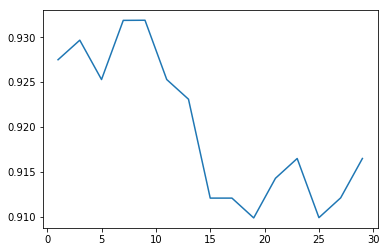

In [67]:
xaxis = []
yaxis = []
for i in range(1,30,2):
    clf = KNeighborsClassifier(n_neighbors= i)
    score = cross_val_score(clf, Xtrain,Ytrain)
    print(i, score.mean())
    xaxis.append(i)
    yaxis.append(score.mean())
    
import matplotlib.pyplot as plt
plt.plot(xaxis,yaxis)
plt.show()

## Scratch Implementation Of KNN

In [94]:
from sklearn.metrics import accuracy_score
from collections import Counter

def predict1(xtrain,ytrain,xtest,k):
    distances = []
    for i in range(len(xtrain)):
        distance = ((xtrain[i,:] - xtest)**2).sum()
        distances.append([distance,i])
    distances = sorted(distances)
    targets = []
    for i in range(k):
        index = distances[i][1]
        targets.append(ytrain[index])
    return Counter(targets).most_common(1)[0][0]

def predict(xtrain,ytrain,xtest_data,k):
    predictions = []
    for xtest in xtest_data:
        predictions.append(predict1(xtrain,ytrain,xtest,k))
    return predictions
    
    

In [95]:
y_pred = predict(Xtrain,Ytrain,Xtest,7)
accuracy_score(Ytest,y_pred)

0.94736842105263153